# Student Score Prediction

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Load Dataset

In [76]:
DATA_PATH = 'StudentPerformanceFactors.csv' 


df = pd.read_csv(DATA_PATH)
print('Initial shape:', df.shape)
print(df.head())

Initial shape: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Q

### Data Exploration

In [77]:
print('\n--- Info ---')
print(df.info())
print('\n--- Missing values ---')
print(df.isnull().sum())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

### Data Preprocessing

In [78]:
df_clean = df.copy()

In [79]:
# Helper mapping dictionaries 
quality_map = {'Low': 1, 'Medium': 2, 'High': 3}
education_map = {'High School': 1, 'College': 2, 'Postgraduate': 3}
distance_map = {'Near': 1, 'Moderate': 2, 'Far': 3}
yesno_map = {'No': 0, 'Yes': 1}
peer_map = {'Negative': 1, 'Neutral': 2, 'Positive': 3}
school_map = {'Public': 0, 'Private': 1}

In [80]:
# Map Teacher_Quality
if 'Teacher_Quality' in df_clean.columns:
    df_clean['Teacher_Quality'] = df_clean['Teacher_Quality'].map(quality_map)
    df_clean['Teacher_Quality'].fillna(df_clean['Teacher_Quality'].mean(), inplace=True)

/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_30735/3349418149.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Teacher_Quality'].fillna(df_clean['Teacher_Quality'].mean(), inplace=True)


In [81]:
# Map Parental_Education_Level
if 'Parental_Education_Level' in df_clean.columns:
    df_clean['Parental_Education_Level'] = df_clean['Parental_Education_Level'].map(education_map)
    df_clean['Parental_Education_Level'].fillna(df_clean['Parental_Education_Level'].mean(), inplace=True)



/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_30735/1501758605.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Parental_Education_Level'].fillna(df_clean['Parental_Education_Level'].mean(), inplace=True)


In [82]:
# Map Distance_from_Home
if 'Distance_from_Home' in df_clean.columns:
    df_clean['Distance_from_Home'] = df_clean['Distance_from_Home'].map(distance_map)
    df_clean['Distance_from_Home'].fillna(df_clean['Distance_from_Home'].mean(), inplace=True)

/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_30735/1227143307.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Distance_from_Home'].fillna(df_clean['Distance_from_Home'].mean(), inplace=True)


In [83]:
# Map Motivation_Level, Parental_Involvement, Access_to_Resources, Family_Income, Peer_Influence
if 'Motivation_Level' in df_clean.columns:
    df_clean['Motivation_Level'] = df_clean['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
if 'Parental_Involvement' in df_clean.columns:
    df_clean['Parental_Involvement'] = df_clean['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
if 'Access_to_Resources' in df_clean.columns:
    df_clean['Access_to_Resources'] = df_clean['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
if 'Family_Income' in df_clean.columns:
    df_clean['Family_Income'] = df_clean['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
if 'Peer_Influence' in df_clean.columns:
    df_clean['Peer_Influence'] = df_clean['Peer_Influence'].map(peer_map)

In [84]:
# Yes/No -> 0/1
for col in ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map(yesno_map)

In [85]:
# School type
if 'School_Type' in df_clean.columns:
    df_clean['School_Type'] = df_clean['School_Type'].map(school_map)

# Gender
if 'Gender' in df_clean.columns:
    df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

In [86]:
#  if there are still object dtypes, apply Label Encoding conservatively
obj_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    from sklearn.preprocessing import LabelEncoder
    for c in obj_cols:
        df_clean[c] = LabelEncoder().fit_transform(df_clean[c].astype(str))

In [87]:
# Final missing-value check: fill any remaining numerical missing values with column mean
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if df_clean[c].isnull().any():
        df_clean[c].fillna(df_clean[c].mean(), inplace=True)


print('\nAfter mapping & filling, missing values:')
print(df_clean.isnull().sum())


After mapping & filling, missing values:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### Feature Engineering


In [88]:
# Create a few derived features that often help prediction
if set(['Hours_Studied','Attendance']).issubset(df_clean.columns):
    df_clean['Study_Efficiency'] = df_clean['Hours_Studied'] / (df_clean['Attendance'] + 1)
if set(['Sleep_Hours','Hours_Studied']).issubset(df_clean.columns):
    df_clean['Sleep_Study_Ratio'] = df_clean['Sleep_Hours'] / (df_clean['Hours_Studied'] + 1)
if set(['Hours_Studied','Extracurricular_Activities']).issubset(df_clean.columns):
    df_clean['Hours_Extracurricular'] = df_clean['Hours_Studied'] * df_clean['Extracurricular_Activities']

### EDA Visuals 

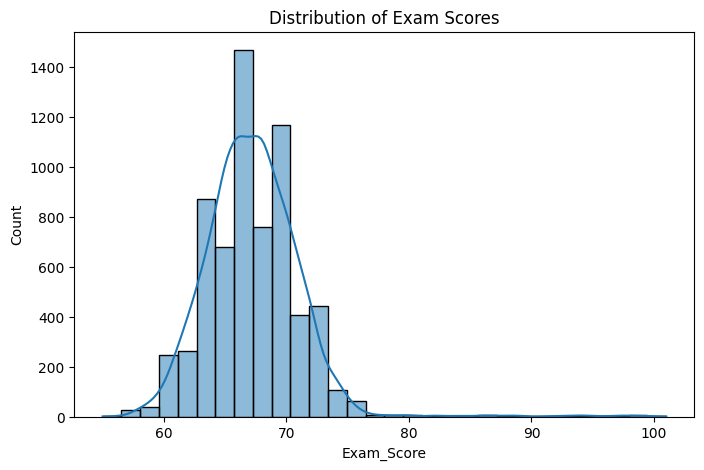

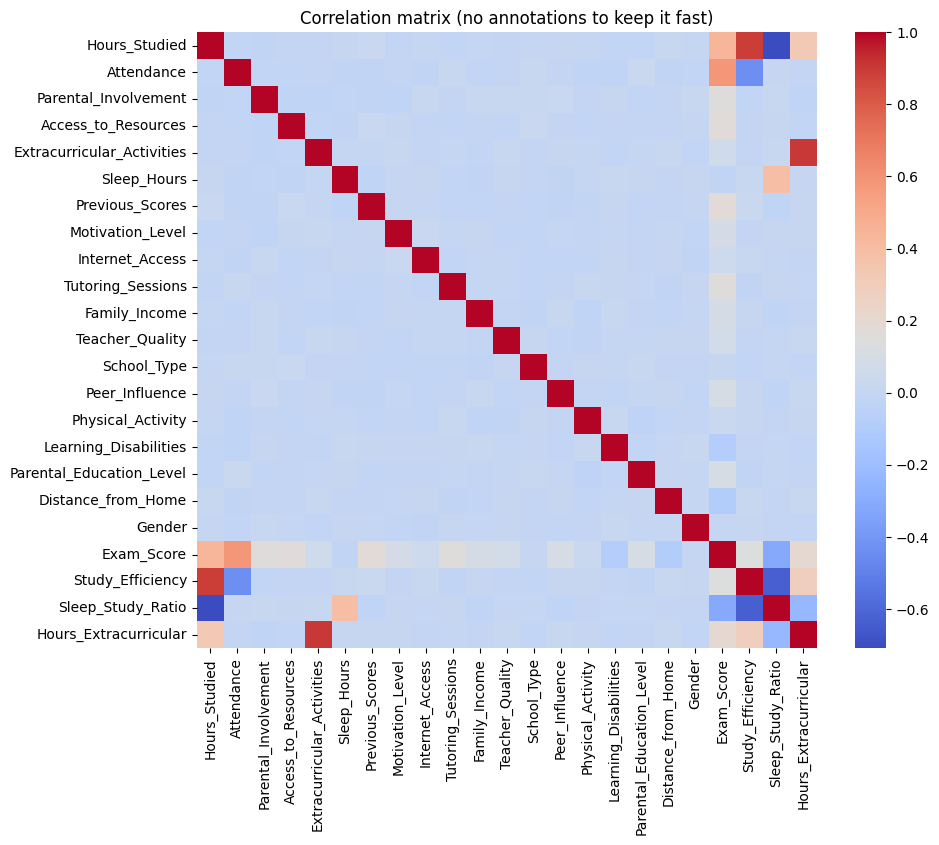

In [89]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Exam_Score'], bins=30, kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation matrix (no annotations to keep it fast)')
plt.show()

### Prepare Features

In [90]:
# We'll use a reasonably large feature set but keep the option to reduce later
TARGET = 'Exam_Score'
all_features = [c for c in df_clean.columns if c != TARGET]

X = df_clean[all_features].copy()
y = df_clean[TARGET].copy()

print('\nFeature set size:', X.shape[1])


Feature set size: 22


### Feature Scaling 

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Train-Test Split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Build Model

In [93]:
models = {}


# Linear Regression (baseline)
models['linear'] = LinearRegression()


# Polynomial Regression (wrapped in pipeline with Ridge)
poly_pipe = Pipeline([
('poly', PolynomialFeatures(degree=2, include_bias=False)),
('ridge', Ridge(alpha=1.0))
])
models['poly'] = poly_pipe


# Random Forest
models['rf'] = RandomForestRegressor(random_state=42)


# Gradient Boosting
models['gb'] = GradientBoostingRegressor(random_state=42)

In [94]:
for name, model in models.items():
    if name in ['rf','gb']:
    # train later with tuned params; do a quick fit for comparison
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"\n{name.upper()} baseline:")
print(" R2:", round(r2_score(y_test, preds), 4))
print(" RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)), 4))


GB baseline:
 R2: 0.7362
 RMSE: 1.9311


In [95]:
# Cross-validated performance (for baseline linear and poly)
print('\nCross-validated R2 (Linear):', cross_val_score(models['linear'], X_scaled, y, cv=5, scoring='r2').mean())
print('Cross-validated R2 (Poly degree=2):', cross_val_score(models['poly'], X_scaled, y, cv=5, scoring='r2').mean())


Cross-validated R2 (Linear): 0.7265632204984555
Cross-validated R2 (Poly degree=2): 0.7034742570983352


### Hyperparameter Tuning

In [96]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
'n_estimators': [100, 200],
'max_depth': [5, 7, None],
'min_samples_split': [2, 5]
}


grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print('\nRandom Forest best params:', grid_rf.best_params_)
print('Random Forest best CV R2:', grid_rf.best_score_)


Random Forest best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest best CV R2: 0.6314620301512567


In [97]:
# Gradient Boosting param grid
gb_param_grid = {
'n_estimators': [100, 200],
'learning_rate': [0.05, 0.1],
'max_depth': [3, 5]
}


grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train, y_train)
print('\nGradient Boosting best params:', grid_gb.best_params_)
print('Gradient Boosting best CV R2:', grid_gb.best_score_)


Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting best CV R2: 0.68779981000474


In [98]:
# Hyperparameter tuning for Polynomial Regression (Ridge alpha)
poly_param_grid = {
'poly__degree': [2, 3],
'ridge__alpha': [0.1, 1.0, 10.0]
}


grid_poly = GridSearchCV(poly_pipe, poly_param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_poly.fit(X_train, y_train)
print('\nPolynomial pipeline best params:', grid_poly.best_params_)
print('Polynomial pipeline best CV R2:', grid_poly.best_score_)


Polynomial pipeline best params: {'poly__degree': 2, 'ridge__alpha': 10.0}
Polynomial pipeline best CV R2: 0.690108779038614


In [99]:
#  Evaluate tuned models on the test set
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_
best_poly = grid_poly.best_estimator_

results = {}
for name, model in [('RandomForest', best_rf), ('GradientBoosting', best_gb), ('Polynomial', best_poly), ('Linear', models['linear'])]:
    preds = model.predict(X_test)
    results[name] = {
    'R2': r2_score(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
    'MAE': mean_absolute_error(y_test, preds)
    }

In [100]:
# Display results
print('\n--- Test set performance (tuned where applicable) ---')
for k,v in results.items():
    print(f"{k}: R2={v['R2']:.4f}, RMSE={v['RMSE']:.4f}, MAE={v['MAE']:.4f}")


--- Test set performance (tuned where applicable) ---
RandomForest: R2=0.6768, RMSE=2.1373, MAE=1.0844
GradientBoosting: R2=0.7437, RMSE=1.9034, MAE=0.6878
Polynomial: R2=0.7478, RMSE=1.8882, MAE=0.6091
Linear: R2=0.7708, RMSE=1.8001, MAE=0.4501


In [101]:
#  Feature importance and coefficients
# For Random Forest
rf_feat_imp = pd.DataFrame({
'feature': all_features,
'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)
print('\nTop features by Random Forest importance:')
print(rf_feat_imp.head(10))


# For Linear Regression (coefficients)
lin_coefs = pd.DataFrame({
'feature': all_features,
'coefficient': models['linear'].coef_
}).sort_values('coefficient', key=lambda x: np.abs(x), ascending=False)
print('\nTop linear coefficients:')
print(lin_coefs.head(10))


Top features by Random Forest importance:
                  feature  importance
1              Attendance    0.395110
0           Hours_Studied    0.218310
6         Previous_Scores    0.078744
19       Study_Efficiency    0.041827
20      Sleep_Study_Ratio    0.036364
2    Parental_Involvement    0.031849
9       Tutoring_Sessions    0.030273
3     Access_to_Resources    0.029672
14      Physical_Activity    0.020881
21  Hours_Extracurricular    0.015763

Top linear coefficients:
                       feature  coefficient
0                Hours_Studied     2.191659
1                   Attendance     2.150627
3          Access_to_Resources     0.729270
6              Previous_Scores     0.707660
2         Parental_Involvement     0.698413
9            Tutoring_Sessions     0.625697
4   Extracurricular_Activities     0.404492
10               Family_Income     0.404263
13              Peer_Influence     0.395904
16    Parental_Education_Level     0.374504


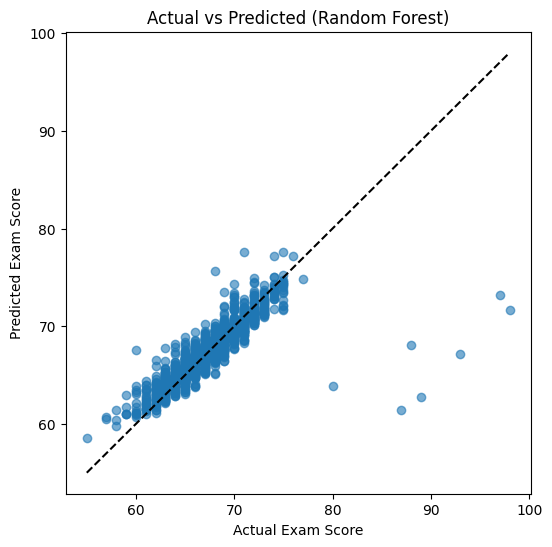

In [102]:
#  Visualizations for best model (example: Random Forest)
plt.figure(figsize=(6,6))
best_preds = best_rf.predict(X_test)
plt.scatter(y_test, best_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()

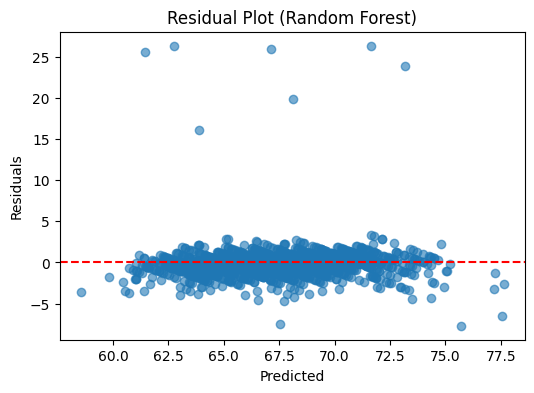

In [103]:
# Residuals
resid = y_test - best_preds
plt.figure(figsize=(6,4))
plt.scatter(best_preds, resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

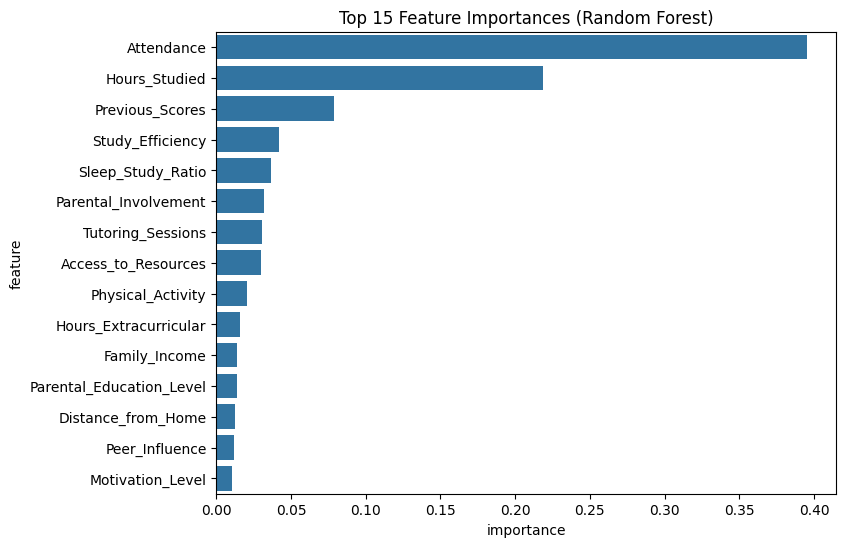

In [104]:
# Feature importance bar
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=rf_feat_imp.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()

In [105]:
# accuracy
accuracy = results['RandomForest']['R2']
print('Random Forest R2:', accuracy)

Random Forest R2: 0.6768346137900367


In [106]:
accuracy2 = results['GradientBoosting']['R2']
print('Gradient Boosting R2:', accuracy2)

Gradient Boosting R2: 0.7436985192638947


In [111]:
accuracy3 = results['Polynomial']['R2']
print('Polynomial Regression R2:', accuracy3)

Polynomial Regression R2: 0.747781602799617


In [112]:
accuracy4 = results['Linear']['R2']
print('Linear Regression R2:', accuracy4)

Linear Regression R2: 0.7707571344637684
